In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np 

2024-10-02 09:59:43.958048: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 09:59:44.097371: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 09:59:44.269192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 09:59:44.413220: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 09:59:44.414273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 09:59:44.668460: I tensorflow/core/platform/cpu_feature_guard.cc:

In [2]:
#Loading CIFER10 dataset
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.cifar10.load_data()

In [3]:
#Have a look on dimensions
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

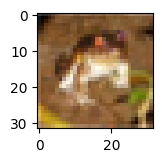

In [5]:
#Showcasing the image
plt.figure(figsize= (1.5,1.5))
plt.imshow(x_train[0],cmap= "gray") 

In [6]:
# Image Labels
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
# Label array shape
y_train.shape

(50000, 1)

In [8]:
#Reshaping category array
category = y_train.reshape(-1,)
category.shape

(50000,)

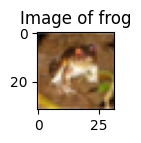

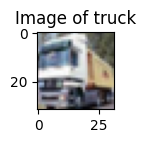

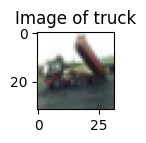

In [9]:
import matplotlib.pyplot as plt

# Function to plot individual images
def plot_img(X,y,index):
    plt.figure(figsize= (1.5,1))
    plt.imshow(X[index], cmap="gray")
    plt.title(f"Image of {labels[category[index]]}")

# Plot the images in each subplot
for i in range(3):
    plot_img(X=x_train,y=y_train, index= i)

plt.show()


In [10]:
# Data Normalization
X_train = x_train/255
X_test = x_test/255

In [11]:
#Fitting ANN Model
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

layer0 = Flatten(input_shape = (32,32,3))
layer1 = Dense(3000,activation ="relu")
layer2 = Dense(1000,activation ="relu")
layer4 = Dense(10,activation ="linear")

model_ann = Sequential([layer0,layer1,layer2,layer4])

model_ann.compile(
    optimizer = Adam(),
    loss = SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model_ann.fit(X_train,y_train,epochs= 5)

Epoch 1/5


2024-10-02 09:59:51.473306: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 247s 157ms/step - accuracy: 0.2771 - loss: 2.2609
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 212s 136ms/step - accuracy: 0.4001 - loss: 1.6785
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 226s 144ms/step - accuracy: 0.4236 - loss: 1.5991
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 130ms/step - accuracy: 0.4424 - loss: 1.5452
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 210s 134ms/step - accuracy: 0.4636 - loss: 1.4974


In [17]:
# Evaluation of the ANN Model
model_ann.summary()
model_ann.evaluate(X_test,y_test)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │     9,219,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     3,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,690,032 (139.96 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,460,022 (93.31 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4635 - loss: 1.5103


[1.5200724601745605, 0.4607999920845032]

In [28]:
# Class Prediction
yann_prob = model_ann.predict(X_test)
yann_pred = [np.argmax(i) for i in yann_prob]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [31]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,yann_pred))

              precision    recall  f1-score   support

           0       0.66      0.38      0.48      1000
           1       0.53      0.65      0.58      1000
           2       0.38      0.22      0.28      1000
           3       0.30      0.41      0.35      1000
           4       0.41      0.38      0.39      1000
           5       0.51      0.23      0.32      1000
           6       0.40      0.66      0.50      1000
           7       0.64      0.39      0.48      1000
           8       0.52      0.69      0.60      1000
           9       0.45      0.61      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



In [37]:
# Making CNN model
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

#CNN Layer
layerc1 = Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3))
layerc2 = MaxPooling2D((2,2))

layerc3 = Conv2D(filters = 64, kernel_size = (3,3), activation = "relu")
layerc4 = MaxPooling2D((2,2))

#Dense Network
layerann0 = Flatten()
layerann1 = Dense(units= 64,activation="relu" )
layerann2 = Dense(units= 64,activation="linear")

model_cnn = Sequential([layerc1,layerc2,layerc3,layerc4, layerann0,layerann1,layerann2])

model_cnn.compile(
    optimizer = Adam(),
    loss = SparseCategoricalCrossentropy(from_logits= True),
    metrics = ["accuracy"]
)


/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# CNN Model fitting 
model_cnn.fit(X_train,y_train,epochs= 5)

Epoch 1/5


2024-10-02 12:01:05.982087: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3489 - loss: 1.8317
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5743 - loss: 1.1966
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6390 - loss: 1.0271
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6737 - loss: 0.9310
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6989 - loss: 0.8670


In [39]:
# CNN Model Evaluation
model_cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6718 - loss: 0.9521


[0.9584354758262634, 0.6680999994277954]